<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2015-01-01'
end = '2016-01-01'

pricing_sample = yf.download("MSFT", start=start, end=end)['Close']
returns_sample = pricing_sample.pct_change()[1:]

[*********************100%%**********************]  1 of 1 completed


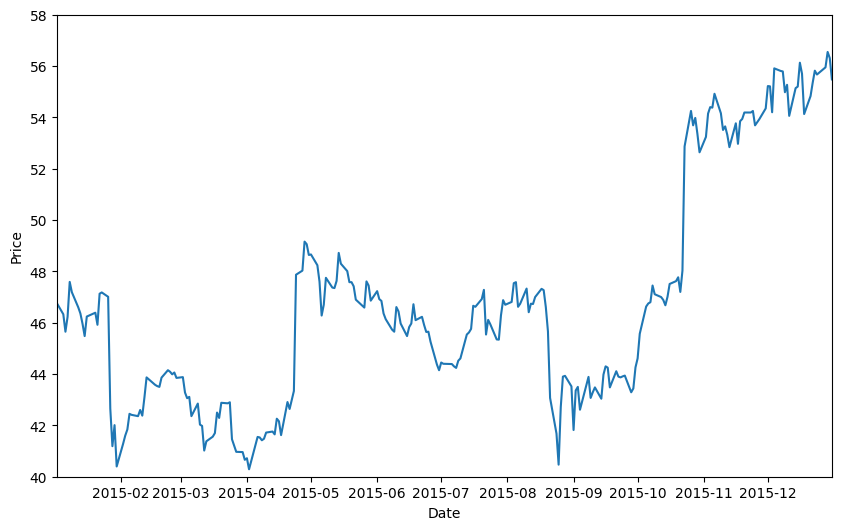

In [3]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(pricing_sample.index, pricing_sample.values)
ax.set_ylim([40, 58])
ax.set_xlim([pricing_sample.index[0], pricing_sample.index[-1]])
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.show()

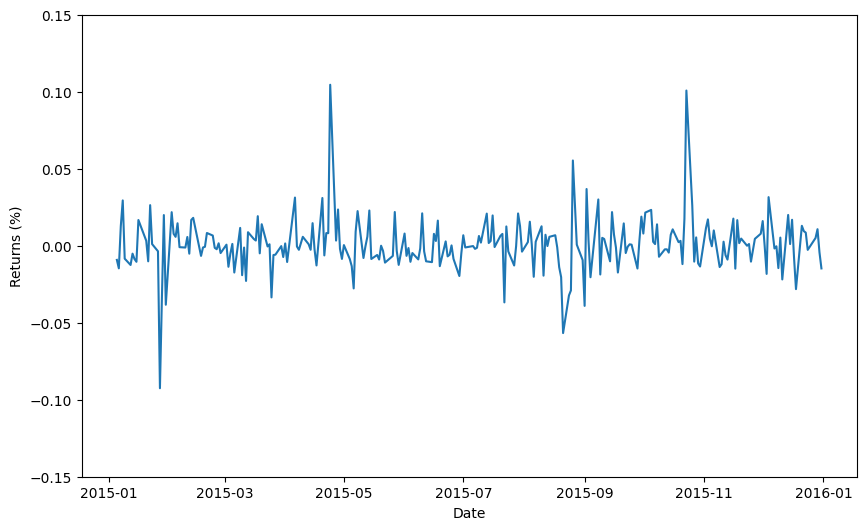

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(returns_sample.index, returns_sample.values)
ax.set_ylim([-0.15, 0.15])
# ax.set_xlim([returns_sample.index[0], returns_sample.index[-1]])
ax.set_xlabel('Date')
ax.set_ylabel('Returns (%)')
plt.show()

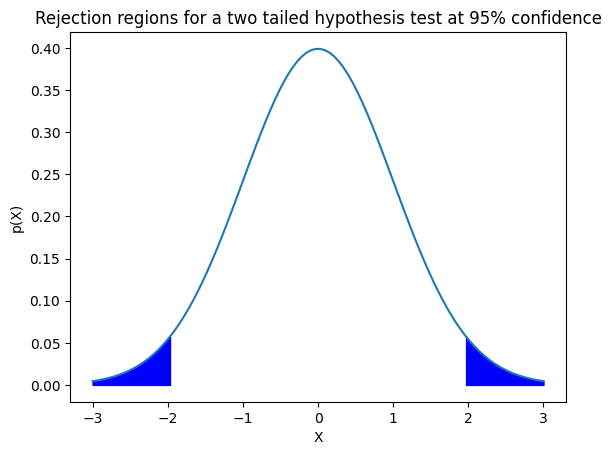

In [5]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1 / np.sqrt(2 * np.pi) * np.exp(-x * x / 2))
y = norm_pdf(x)

fig, ax = plt.subplots(1, 1, sharex=True)
ax.plot(x, y)
ax.fill_between(x, 0, y, color='blue', where=x>1.96)
ax.fill_between(x, 0, y, color='blue', where=x<-1.96)
plt.title('Rejection regions for a two tailed hypothesis test at 95% confidence')
ax.set_xlabel('X')
ax.set_ylabel('p(X)')
plt.show()

In [6]:
n = len(returns_sample)
test_statistic = (
    (returns_sample.mean() - 0) /
    (returns_sample.std() / np.sqrt(n))
)
print(f'Test statistic: {test_statistic:0.4f}')

Test statistic: 0.7450


In [7]:
from scipy import stats as stats

In [8]:
pval = 2 * (1 - stats.t.cdf(test_statistic, n-1))
print(f'P-value is: {pval}')

P-value is: 0.4569997843724236


## Hypothesis Testing on Means

In [9]:
symbol_list = ['SPY', 'AAPL']
start = '2015-01-01'
end = '2016-01-01'

pricing_sample = yf.download(symbol_list, start=start, end=end)['Close']
# pricing_sample.columns = map(lambda x: x.symbol, pricing_sample.columns)
pricing_sample

[*********************100%%**********************]  2 of 2 completed


Ticker,AAPL,SPY
Date,,
2015-01-02,27.332500,205.429993
2015-01-05,26.562500,201.720001
2015-01-06,26.565001,199.820007
2015-01-07,26.937500,202.309998
2015-01-08,27.972500,205.899994
...,...,...
2015-12-24,27.007500,205.679993
2015-12-28,26.705000,205.210007
2015-12-29,27.184999,207.399994


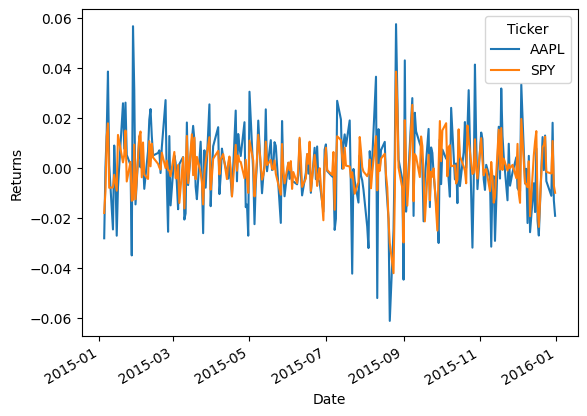

In [10]:
returns_sample = pricing_sample.pct_change()[1:]
returns_sample.plot()
plt.ylabel('Returns')
plt.show()

In [11]:
mu_spy, mu_aapl = returns_sample.mean()
std_spy, std_aapl = returns_sample.std()

n_spy = len(returns_sample['SPY'])
n_aapl = len(returns_sample['AAPL'])

test_statistic = ((mu_spy - mu_aapl) - 0)/((std_spy**2/n_spy) + (std_aapl**2/n_aapl))**0.5
df = ((std_spy**2/n_spy) + (std_aapl**2/n_aapl))**2/(((std_spy**2 / n_spy)**2 /n_spy)+((std_aapl**2 / n_aapl)**2/n_aapl))

print(f'T-Test Statistic: {np.abs(test_statistic):0.4f}')
print(f'Degrees of Freedom: {df}')

T-Test Statistic: 0.0222
Degrees of Freedom: 403.9373134571426


## Hypothesis Testing on Variances

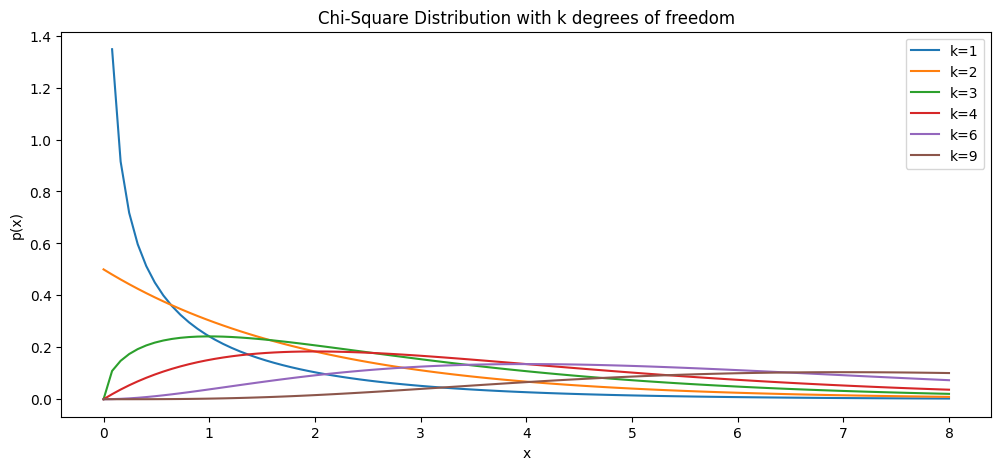

In [12]:
x = np.linspace(0, 8, 100)
y_1 = stats.chi2.pdf(x, 1)
y_2 = stats.chi2.pdf(x, 2)
y_3 = stats.chi2.pdf(x, 3)
y_4 = stats.chi2.pdf(x, 4)
y_5 = stats.chi2.pdf(x, 5)
y_6 = stats.chi2.pdf(x, 6)
y_7 = stats.chi2.pdf(x, 7)
y_8 = stats.chi2.pdf(x, 8)
y_9 = stats.chi2.pdf(x, 9)

fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(x, y_1, label='k=1')
ax.plot(x, y_2, label='k=2')
ax.plot(x, y_3, label='k=3')
ax.plot(x, y_4, label='k=4')
ax.plot(x, y_6, label='k=6')
ax.plot(x, y_9, label='k=9')
ax.legend()
plt.title('Chi-Square Distribution with k degrees of freedom')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

[*********************100%%**********************]  1 of 1 completed


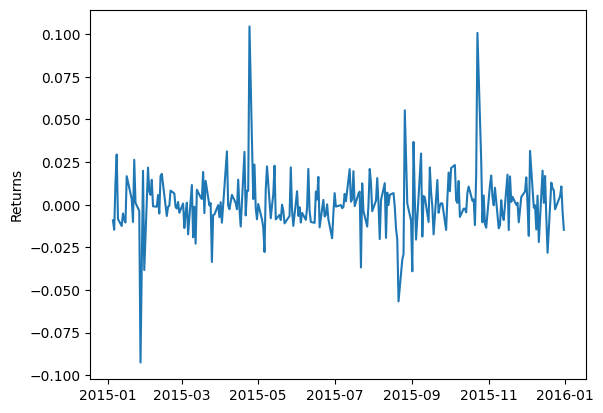

In [13]:
start = "2015-01-01"
end = "2016-01-01"

pricing_sample = yf.download('MSFT', start=start, end=end)['Close']
returns_sample = pricing_sample.pct_change()[1:]
plt.plot(returns_sample.index, returns_sample.values)
plt.ylabel('Returns')
plt.show()

In [14]:
test_statistic = (len(returns_sample) - 1) * returns_sample.std() ** 2 / 0.0001
print(f'Chi-square test statistic: {test_statistic}')

Chi-square test statistic: 794.9891044993869


In [15]:
crit_value = stats.chi2.ppf(0.99, len(returns_sample) - 1)
print(f'Critical value at alpha = 0.01 with 251 DoF: {crit_value}')

Critical value at alpha = 0.01 with 251 DoF: 304.9395557339572


### Comparing Variances

In [16]:
symbol_list = ['SPY', 'AAPL']
start = '2015-01-01'
end = '2016-01-01'

pricing_sample = yf.download(symbol_list, start=start, end=end)['Close']
returns_sample = pricing_sample.pct_change()[1:]

aapl_std, spy_std = returns_sample.std()
print(f'\nSPY Standard Deviation: {spy_std:0.5f}')
print(f'AAPL Standard Deviation: {aapl_std:0.5f}')

[*********************100%%**********************]  2 of 2 completed


SPY Standard Deviation: 0.00983
AAPL Standard Deviation: 0.01686


In [39]:
test_statistic = (aapl_std / spy_std) ** 2
print(f'F Test Statistic: {test_statistic}')

F Test Statistic: 2.9425492146535213


In [18]:
df_aapl = returns_sample['AAPL'].shape[0] - 1
df_spy = returns_sample['SPY'].shape[0] - 1

print(f'DoF AAPL: {df_aapl}')
print(f'DoF SPY : {df_spy}')

DoF AAPL: 250
DoF SPY : 250


In [19]:
upper_crit_value = stats.f.ppf(0.975, df_aapl, df_spy)
lower_crit_value = stats.f.ppf(0.025, df_aapl, df_spy)

print(f'The upper critical value: {upper_crit_value}')
print(f'The lower critical value: {lower_crit_value}')

The upper critical value: 1.2820806494835295
The lower critical value: 0.7799821332634866


## Questions

In [20]:
# 1. One tail test
# H0 = mean of returns < 0, HA = mean of returns > 0
ticker = 'TSLA'
prices = yf.download(ticker, start='2015-01-01', end='2016-01-01')['Close']
returns_sample_tsla = prices.pct_change()[1:]

print(f'\nTSLA return sample mean: {returns_sample_tsla.mean()}')
print(f'TSLA return sample standard deviation: {returns_sample_tsla.std()}')
print(f'TSLA return sample size: {returns_sample_tsla.shape[0]}')

[*********************100%%**********************]  1 of 1 completed


TSLA return sample mean: 0.0006575863169929778
TSLA return sample standard deviation: 0.024501354135921725
TSLA return sample size: 251


In [21]:
mu, std = returns_sample_tsla.mean(), returns_sample_tsla.std()
n = returns_sample_tsla.shape[0]
test_statistic = mu / (std * n ** 0.5)
print(f'Test Statistic: {test_statistic}')

p_val = (1 - stats.t.cdf(test_statistic, n - 1))
print(f'P Value = {p_val}')

Test Statistic: 0.001694048420903945
P Value = 0.4993248482720095


In [22]:
### Fail to reject the null hypothesis
# Null hypothesis - No difference in average returns in both populations, the mean is less than 0
# Alternative hypothesis - There is a difference in average returns of both populations, the mean is not less than 0

In [23]:
p_val = 2 * (1 - stats.t.cdf(test_statistic, n - 1))
print(f'P Value = {p_val}')

P Value = 0.998649696544019


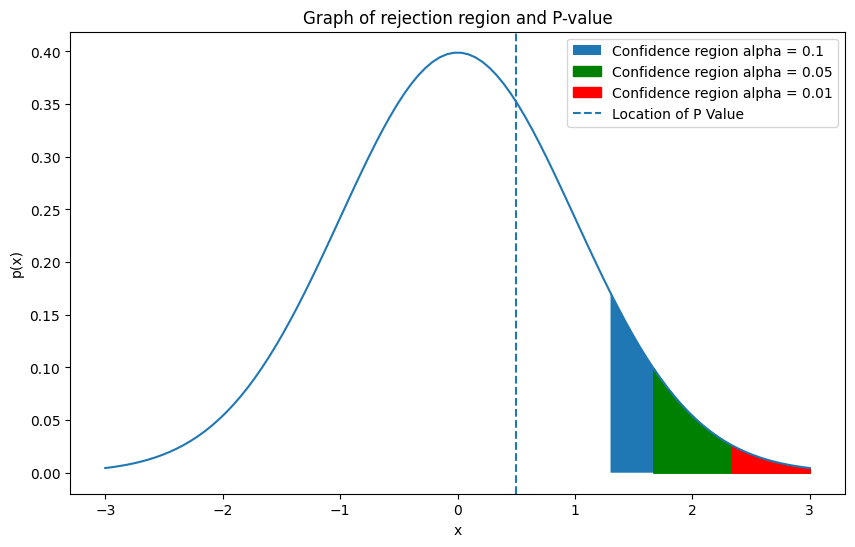

In [24]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y)

ax.fill_between(x, 0, y, where = x > 1.282, label = 'Confidence region alpha = 0.1')
ax.fill_between(x, 0, y, where = x > 1.645, label = 'Confidence region alpha = 0.05', color = 'green')
ax.fill_between(x, 0, y, where = x > 2.326, label = 'Confidence region alpha = 0.01', color = 'red')
plt.axvline(p_val / 2, linestyle = 'dashed', label = 'Location of P Value')

plt.title('Graph of rejection region and P-value')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

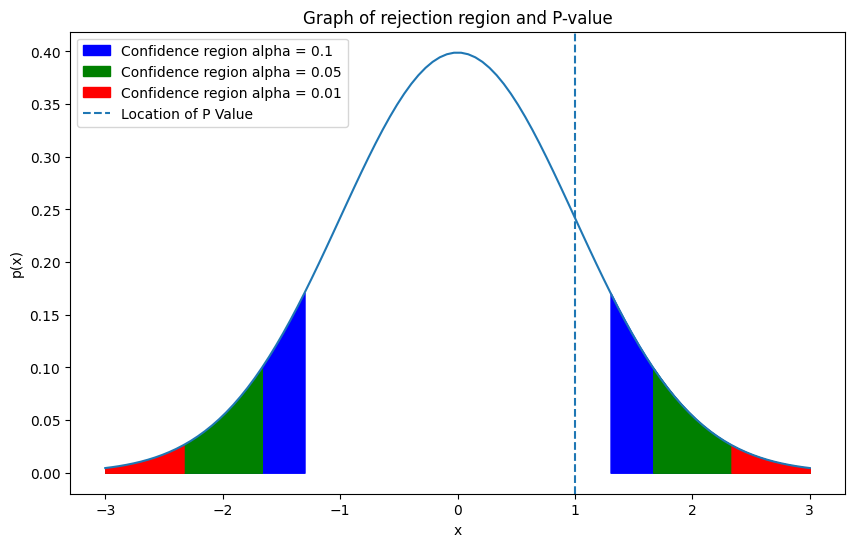

In [25]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y)

ax.fill_between(x, 0, y, where = x > 1.282, label = 'Confidence region alpha = 0.1', color='blue')
ax.fill_between(x, 0, y, where = x > 1.645, label = 'Confidence region alpha = 0.05', color = 'green')
ax.fill_between(x, 0, y, where = x > 2.326, label = 'Confidence region alpha = 0.01', color = 'red')

ax.fill_between(x, 0, y, where = x < -1.282, color='blue')
ax.fill_between(x, 0, y, where = x < -1.645, color = 'green')
ax.fill_between(x, 0, y, where = x < -2.326, color = 'red')
plt.axvline(p_val, linestyle = 'dashed', label = 'Location of P Value')

plt.title('Graph of rejection region and P-value')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend();

In [26]:
# Exercise 2:

alpha = 0.1
f = 1 - (alpha / 2)
print(f'alpha = 10%:: {f:0.4f}')

alpha = 0.05
f = 1 - (alpha / 2)
print(f'alpha = 5%:: {f:0.4f}')

alpha = 0.01
f = 1 - (alpha / 2)
print(f'alpha = 1%:: {f:0.4f}')

alpha = 10%:: 0.9500
alpha = 5%:: 0.9750
alpha = 1%:: 0.9950


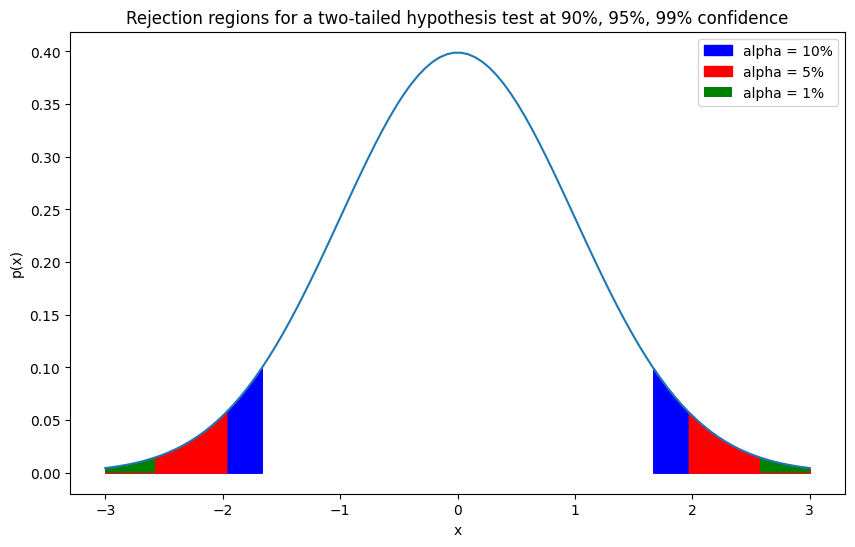

In [27]:
x = np.linspace(-3, 3, 100)
norm_pdf = lambda x: (1/np.sqrt(2 * np.pi)) * np.exp(-x * x / 2)
y = norm_pdf(x)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y)

# Value for alpha = 1%
ax.fill_between(x, 0, y, where =  x > 1.645, color='blue', label = 'alpha = 10%')
ax.fill_between(x, 0, y, where = x < -1.645, color='blue')

# Value for alpha = 5%
ax.fill_between(x, 0, y, where = x > 1.96, color = 'red', label = 'alpha = 5%')
ax.fill_between(x, 0, y, where = x < -1.96, color = 'red')

#Value for alpha = 10%
ax.fill_between(x, 0, y, where = x > 2.575, facecolor='green', label = 'alpha = 1%')
ax.fill_between(x, 0, y, where = x < -2.575, facecolor='green')

plt.title('Rejection regions for a two-tailed hypothesis test at 90%, 95%, 99% confidence')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.legend()
plt.show()

In [28]:
# mean t-test
alpha = 0.1
f = 1 - (alpha / 2)

data = yf.download('SPY', start='2016-01-01', end='2017-01-01')['Close']
returns_sample = data.pct_change()[1:]

n = returns_sample.shape[0]
mu, std = returns_sample.mean(), returns_sample.std()

test_statistic = (mu - 0) / (std / np.sqrt(n))
print(f'\nCritical value: {f:0.4f}')
print(f'Test Statistic: {test_statistic:0.4f}')

[*********************100%%**********************]  1 of 1 completed


Critical value: 0.9500
Test Statistic: 0.8783


In [29]:
p_val = 2 * (1 - stats.t.cdf(test_statistic, n - 1))
print(f'P Value = {p_val}')

P Value = 0.3806018117842256


In [36]:
# Exercise 3
alpha = 0.1
sym_list = ['XLF', 'MCD']
start = '2015-01-01'
end = '2016-01-01'

pricing_sample = yf.download(sym_list, start=start, end=end)['Close']
returns_sample = pricing_sample.pct_change()[1:]

mu_xlf, mu_gs = returns_sample.mean()
s_xlf, s_gs = returns_sample.std()
n_xlf, n_gs = returns_sample['XLF'].shape[0], returns_sample['MCD'].shape[0]

test_statistic = ((mu_xlf - mu_gs) - 0)/((s_xlf**2/n_xlf) + (s_gs**2/n_gs))**0.5
df = ((s_xlf**2/n_xlf) + (s_gs**2/n_gs))**2/ \
     (((s_xlf**2 / n_xlf)**2 /(n_xlf-1))+((s_gs**2 / n_gs)**2/(n_gs-1)))
pval = 2 * (1 - stats.t.cdf(test_statistic, df))

print(f'\nT-Test Statistic: {test_statistic:0.4f}')
print(f'Degrees of Freedom: {df:0.4f}')
print(f'P-Value: {pval:0.4f}')

[*********************100%%**********************]  2 of 2 completed


T-Test Statistic: 1.0537
Degrees of Freedom: 496.8378
P-Value: 0.2925


In [37]:
if pval > alpha:
    print(f'Failed to reject the null hypothesis')
    print(f'The difference in returns is not significantly different from zero')
else:
    print(f'Reject the null hypothesis')
    print(f'The difference in returns in significantly different from zero')

Failed to reject the null hypothesis
The difference in returns is not significantly different from zero


In [40]:
# Testing on variances

print(f'XLF standard deviation is: {s_xlf}')
print(f'MCD standard deviation is: {s_gs}')

test_statistic = (s_xlf / s_gs) ** 2
print(f'F Test Statistic: {test_statistic}')

XLF standard deviation is: 0.012153658850884484
MCD standard deviation is: 0.01121981297437352
F Test Statistic: 1.1733912574603644


In [41]:
df1, df2 = n_xlf - 1, n_gs - 1
print(f'Degrees of freedom: {df1}, {df2}')

Degrees of freedom: 250, 250


In [45]:
upper_crit_value = stats.f.ppf(0.975, df1, df2)
lower_crit_value = stats.f.ppf(0.025, df1, df2)
print('Upper critical value at a = 0.05 with df1 = {0} and df2 = {1}: '.format(df1, df2), upper_crit_value)
print('Lower critical value at a = 0.05 with df1 = {0} and df2 = {1}: '.format(df1, df2), lower_crit_value)

Upper critical value at a = 0.05 with df1 = 250 and df2 = 250:  1.2820806494835295
Lower critical value at a = 0.05 with df1 = 250 and df2 = 250:  0.7799821332634866
